## Exploratory Analysis of Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

# Notebook niceties
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 300

# Inline plots for notebook
%matplotlib inline

print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")

pandas: 2.3.3
seaborn: 0.13.2


### 1. Loading data


In [4]:
# Add parent directory to Python path to import src modules
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

In [5]:
from src.utils.data_loader import load_dataset_split
df = load_dataset_split("../data/train")

 ===> Loading cached dataset from ../data/train\cached_dataset.csv


### 2. Quick Overview

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  3459 non-null   object
 1   code         3459 non-null   object
 2   tags         3459 non-null   object
dtypes: object(3)
memory usage: 81.2+ KB


In [7]:
df.head(3)

,description,code,tags
0,"There are $$$n$$$ positive integers $$$a_1, a_2, \dots, a_n$$$. For the one move you can choose any even value $$$c$$$ and divide by two all elements that equal $$$c$$$.For example, if $$$a=[6,8,12,6,3,12]$$$ and you choose $$$c=6$$$, and $$$a$$$ is transformed into $$$a=[3,8,12,3,3,12]$$$ after...","a = int(input())\nfor i in range(a):\n f = int(input())\n k = list(map(int, input().split()))\n l = set()\n ch = 0\n lol = 0\n for i in range(len(k)):\n lol = k[i]\n while lol % 2 == 0:\n l.add(lol)\n lol /= 2\n print(len(l))","[number theory, greedy]"
1,"A positive (strictly greater than zero) integer is called round if it is of the form d00...0. In other words, a positive integer is round if all its digits except the leftmost (most significant) are equal to zero. In particular, all numbers from $$$1$$$ to $$$9$$$ (inclusive) are round.For examp...","t = int(input())\nfor i in range(t):\n canPrintLength = True\n summends = []\n num = int(input())\n if num in range(1,11):\n print(1)\n print(num)\n else:\n a = 10\n g = str(num)\n length = len(g)\n while num!=0:\n rem = num%a\n...","[implementation, math]"
2,"Polycarp is working on a new project called ""Polychat"". Following modern tendencies in IT, he decided, that this project should contain chat as well. To achieve this goal, Polycarp has spent several hours in front of his laptop and implemented a chat server that can process three types of comman...",import sys\nz=x=0\nfor s in sys.stdin:\n\tif s[0]=='+':\n\t\tx+=1\n\telif s[0]=='-':\n\t\tx-=1\n\telse:\n\t\tz+=(len(s)-s.find(':')-2)*x\nprint z,[implementation]


In [8]:
df.describe(include='all')

,description,code,tags
count,3459,3459,3459
unique,3459,3459,1454
top,"There are $$$n$$$ positive integers $$$a_1, a_2, \dots, a_n$$$. For the one move you can choose any even value $$$c$$$ and divide by two all elements that equal $$$c$$$.For example, if $$$a=[6,8,12,6,3,12]$$$ and you choose $$$c=6$$$, and $$$a$$$ is transformed into $$$a=[3,8,12,3,3,12]$$$ after...","a = int(input())\nfor i in range(a):\n f = int(input())\n k = list(map(int, input().split()))\n l = set()\n ch = 0\n lol = 0\n for i in range(len(k)):\n lol = k[i]\n while lol % 2 == 0:\n l.add(lol)\n lol /= 2\n print(len(l))",[implementation]
freq,1,1,195


### 3. Tags Distribution

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional

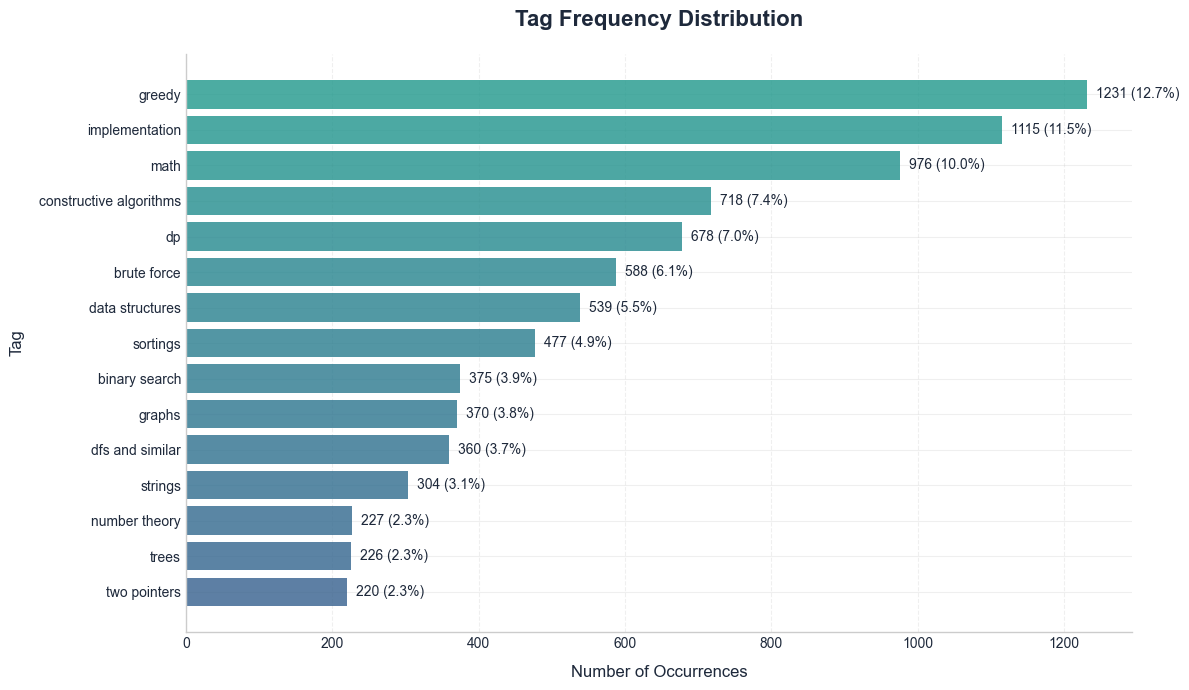


Tag Distribution Summary:
Total tags used: 9718
Unique tags: 37
Average tags per entry: 2.81


In [22]:
def plot_tag_distribution(df: pd.DataFrame, 
                         top_n: int = 15, 
                         figsize: tuple = (12, 7),
                         color_palette: Optional[list] = None) -> tuple:
    """
    Plot the distribution of tags in the dataset.
    
    Args:
        df: DataFrame containing a 'tags' column with lists of tags
        top_n: Number of top tags to display
        figsize: Figure size as (width, height)
        color_palette: Optional custom color palette
        
    Returns:
        tuple: (figure, axis) matplotlib objects
    """
    # Flatten all tags and count
    all_tags = [t for tags in df["tags"] for t in tags]
    tag_counts = Counter(all_tags)
    total_tags = sum(tag_counts.values())

    # Create and sort DataFrame
    tag_df = (
        pd.DataFrame(tag_counts.items(), columns=["tag", "count"])
        .assign(percentage=lambda x: (x["count"] / total_tags * 100))
        .sort_values("count", ascending=True)
    )

    # Focus on top N tags
    tag_df = tag_df.tail(top_n)

    # Set up the plot style
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=figsize)

    # Define color scheme
    if color_palette is None:
        color_palette = plt.cm.viridis(np.linspace(0.3, 0.9, len(tag_counts)))

    # Plot horizontal bars
    bars = ax.barh(tag_df["tag"], 
                    tag_df["count"],
                    color=color_palette,
                    alpha=0.8,
                    edgecolor="none")

    # Add count and percentage labels
    for idx, bar in enumerate(bars):
        width = bar.get_width()
        percentage = tag_df.iloc[idx]["percentage"]
        
        ax.text(
            width + max(tag_df["count"]) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{int(width)} ({percentage:.1f}%)",
            va="center",
            ha="left",
            fontsize=10,
            color="#1E293B"
        )

    # Customize appearance
    ax.set_title("Tag Frequency Distribution", 
                fontsize=16,
                fontweight="bold",
                color="#1E293B",
                pad=20)
    
    ax.set_xlabel("Number of Occurrences", 
                    fontsize=12,
                    color="#1E293B",
                    labelpad=10)
    
    ax.set_ylabel("Tag",
                    fontsize=12,
                    color="#1E293B",
                    labelpad=10)

    # Style the grid and spines
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    # Adjust tick parameters
    ax.tick_params(axis="both",
                    labelsize=10,
                    colors="#1E293B",
                    grid_alpha=0.3)

    plt.tight_layout()
    return fig, ax

# Plot the tag distribution
fig, ax = plot_tag_distribution(df, top_n=15)
plt.show()

# Print summary statistics
if fig is not None:
    print("\nTag Distribution Summary:")
    all_tags = [t for tags in df["tags"] for t in tags]
    tag_counts = Counter(all_tags)
    total_tags = sum(tag_counts.values())
    unique_tags = len(tag_counts)
    
    print(f"Total tags used: {total_tags}")
    print(f"Unique tags: {unique_tags}")
    print(f"Average tags per entry: {total_tags/len(df):.2f}")

#### 3.1. Target Tags distribution

In [15]:
TARGET_TAGS = [
    'math', 'graphs', 'strings', 'number theory',
    'trees', 'geometry', 'games', 'probabilities'
]

==> Saved visualization to: ../results/plots/target_tags_distribution.png


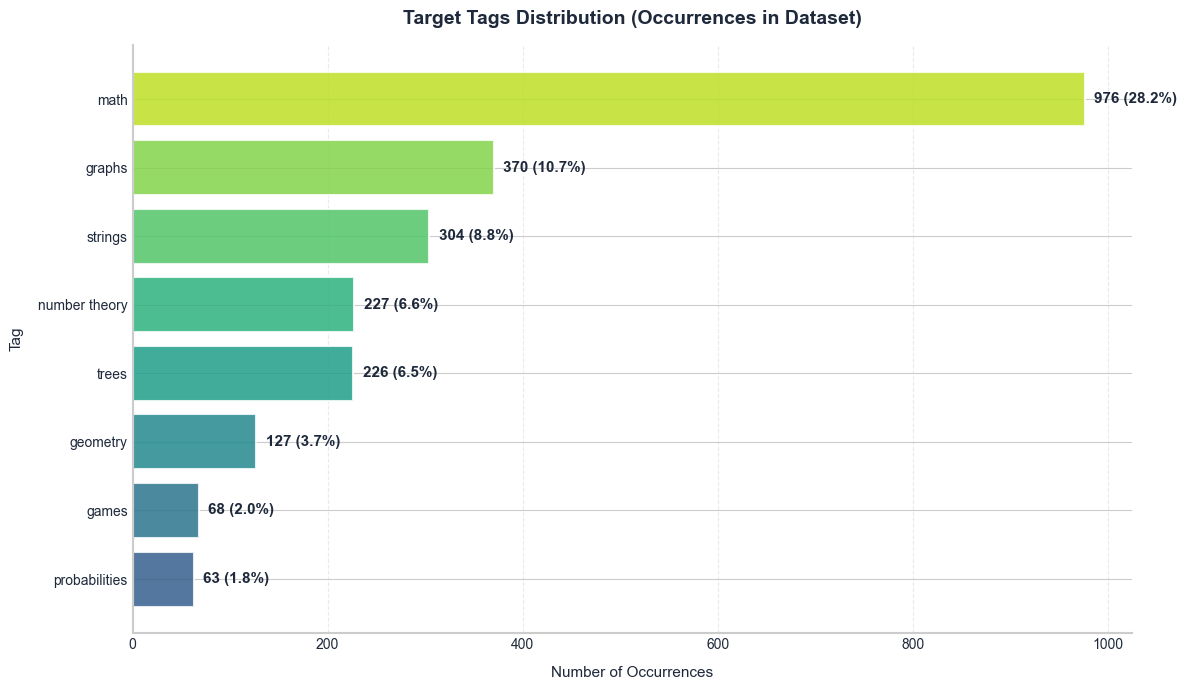


                    TARGET TAGS DETAILED ANALYSIS
Tag                Count   % of Samples    % of All Tags
---------------------------------------------------------------------------
math                 976         28.22%           10.04%
graphs               370         10.70%            3.81%
strings              304          8.79%            3.13%
number theory        227          6.56%            2.34%
trees                226          6.53%            2.33%
geometry             127          3.67%            1.31%
games                 68          1.97%            0.70%
probabilities         63          1.82%            0.65%
---------------------------------------------------------------------------
TOTAL               2361         68.26%           24.30%

==> Key Insights:
   • Most common target tag: 'math' with 976 occurrences
   • Least common target tag: 'probabilities' with 63 occurrences
   • Ratio (most/least): 15.5x
   • Target tags represent 24.3% of all tags in datase

In [20]:
# Enhanced Visualization for Target Tags Distribution
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get all tags from dataset
all_tags = [t for tags in df["tags"] for t in tags]
tag_counts = Counter(all_tags)
total_samples = len(df)
total_tags = sum(tag_counts.values())

# Filter for target tags only
target_data = []
for tag in TARGET_TAGS:
    count = tag_counts.get(tag, 0)
    percentage_of_samples = (count / total_samples) * 100
    percentage_of_all_tags = (count / total_tags) * 100
    target_data.append({
        'tag': tag,
        'count': count,
        'pct_samples': percentage_of_samples,
        'pct_tags': percentage_of_all_tags
    })

# Create DataFrame and sort by count
target_df = pd.DataFrame(target_data).sort_values('count', ascending=True)

# Create figure with single plot
fig, ax = plt.subplots(figsize=(12, 7))

# Bar chart with gradient colors
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(target_df)))
bars = ax.barh(target_df['tag'], target_df['count'], 
                color=colors, alpha=0.85, edgecolor='white', linewidth=1.5)

# Add count and percentage labels
for idx, bar in enumerate(bars):
    width = bar.get_width()
    pct = target_df.iloc[idx]['pct_samples']
    ax.text(width + max(target_df['count']) * 0.01,
             bar.get_y() + bar.get_height() / 2,
             f'{int(width)} ({pct:.1f}%)',
             va='center', ha='left', fontsize=11, 
             color='#1E293B', fontweight='bold')

# Styling
ax.set_title('Target Tags Distribution (Occurrences in Dataset)', 
              fontsize=14, fontweight='bold', color='#1E293B', pad=15)
ax.set_xlabel('Number of Occurrences', fontsize=11, color='#1E293B', labelpad=10)
ax.set_ylabel('Tag', fontsize=11, color='#1E293B', labelpad=10)
ax.grid(True, axis='x', linestyle='--', alpha=0.4, linewidth=0.8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', labelsize=10, colors='#1E293B')

plt.tight_layout()
plt.savefig('figures/target_tags_distribution.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
print("==> Saved visualization to: ../results/plots/target_tags_distribution.png")
plt.show()

# ===== DETAILED STATISTICS TABLE =====
print("\n" + "="*75)
print(" "*20 + "TARGET TAGS DETAILED ANALYSIS")
print("="*75)
print(f"{'Tag':<15} {'Count':>8} {'% of Samples':>14} {'% of All Tags':>16}")
print("-"*75)

sorted_stats = target_df.sort_values('count', ascending=False)
for _, row in sorted_stats.iterrows():
    print(f"{row['tag']:<15} {int(row['count']):>8} {row['pct_samples']:>13.2f}% {row['pct_tags']:>15.2f}%")

print("-"*75)
print(f"{'TOTAL':<15} {int(sorted_stats['count'].sum()):>8} {sorted_stats['pct_samples'].sum():>13.2f}% {sorted_stats['pct_tags'].sum():>15.2f}%")
print("="*75)

# Additional insights
print(f"\n==> Key Insights:")
print(f"   • Most common target tag: '{sorted_stats.iloc[0]['tag']}' with {int(sorted_stats.iloc[0]['count'])} occurrences")
print(f"   • Least common target tag: '{sorted_stats.iloc[-1]['tag']}' with {int(sorted_stats.iloc[-1]['count'])} occurrences")
print(f"   • Ratio (most/least): {sorted_stats.iloc[0]['count'] / sorted_stats.iloc[-1]['count']:.1f}x")
print(f"   • Target tags represent {sorted_stats['pct_tags'].sum():.1f}% of all tags in dataset")
print(f"   • Average occurrences per target tag: {sorted_stats['count'].mean():.1f}")

#### 3.2. Target Tags per problem

==> Saved visualization to: ../results/plots/target_tags_per_problem.png


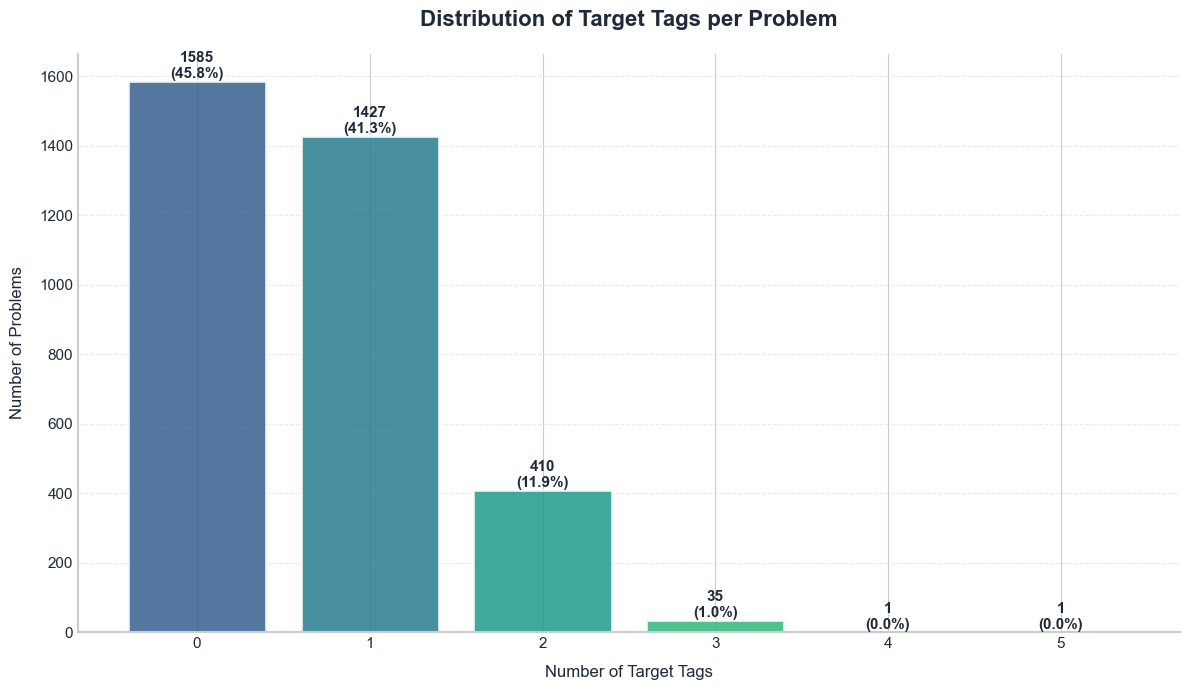


               TARGET TAGS PER PROBLEM - STATISTICS

# Target Tags   Count        Percentage      Cumulative %
----------------------------------------------------------------------
0               1585                45.82%         45.82%
1               1427                41.25%         87.08%
2               410                 11.85%         98.93%
3               35                   1.01%         99.94%
4               1                    0.03%         99.97%
5               1                    0.03%        100.00%

==> Key Statistics:
   • Problems with at least 1 target tag: 1874 (54.2%)
   • Problems with NO target tags: 1585 (45.8%)
   • Average target tags per problem: 0.68
   • Maximum target tags in a problem: 5
   • Most common count: 0 target tag(s) per problem


In [21]:
# Number of TARGET tags per problem
def count_target_tags(tags_list):
    return len([tag for tag in tags_list if tag in TARGET_TAGS])

df["num_target_tags"] = df["tags"].apply(count_target_tags)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))

counts = df["num_target_tags"].value_counts().sort_index()
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(counts)))

bars = ax.bar(counts.index, counts.values, color=colors_gradient, 
              alpha=0.85, edgecolor='white', linewidth=2)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='#1E293B')

ax.set_title("Distribution of Target Tags per Problem", 
            fontsize=16, fontweight='bold', color='#1E293B', pad=20)
ax.set_xlabel("Number of Target Tags", fontsize=12, color='#1E293B', labelpad=10)
ax.set_ylabel("Number of Problems", fontsize=12, color='#1E293B', labelpad=10)
ax.grid(True, axis='y', linestyle='--', alpha=0.4, linewidth=0.8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_xticks(range(int(df["num_target_tags"].max()) + 1))
ax.tick_params(axis='both', labelsize=11, colors='#1E293B')

plt.tight_layout()
plt.savefig('figures/target_tags_per_problem.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
print("==> Saved visualization to: ../results/plots/target_tags_per_problem.png")
plt.show()

# Detailed statistics
has_target = (df["num_target_tags"] > 0).sum()
no_target = (df["num_target_tags"] == 0).sum()

print("\n" + "="*70)
print(" "*15 + "TARGET TAGS PER PROBLEM - STATISTICS")
print("="*70)
print(f"\n{'# Target Tags':<15} {'Count':<12} {'Percentage':<15} {'Cumulative %'}")
print("-"*70)

cumulative = 0
for num_tags in sorted(counts.index):
    count = counts[num_tags]
    pct = count / len(df) * 100
    cumulative += pct
    print(f"{num_tags:<15} {count:<12} {pct:>12.2f}%  {cumulative:>12.2f}%")

print("="*70)

print(f"\n==> Key Statistics:")
print(f"   • Problems with at least 1 target tag: {has_target} ({has_target/len(df)*100:.1f}%)")
print(f"   • Problems with NO target tags: {no_target} ({no_target/len(df)*100:.1f}%)")
print(f"   • Average target tags per problem: {df['num_target_tags'].mean():.2f}")
print(f"   • Maximum target tags in a problem: {df['num_target_tags'].max()}")
print(f"   • Most common count: {counts.idxmax()} target tag(s) per problem")

#### 3.3. Co-occurences between tags

Analyzing 1874 problems that have at least one target tag

==> Saved conditional probabilities plot to: figures/target_tags_conditional_probabilities.png
==> Saved conditional probabilities plot to: figures/target_tags_conditional_probabilities.png


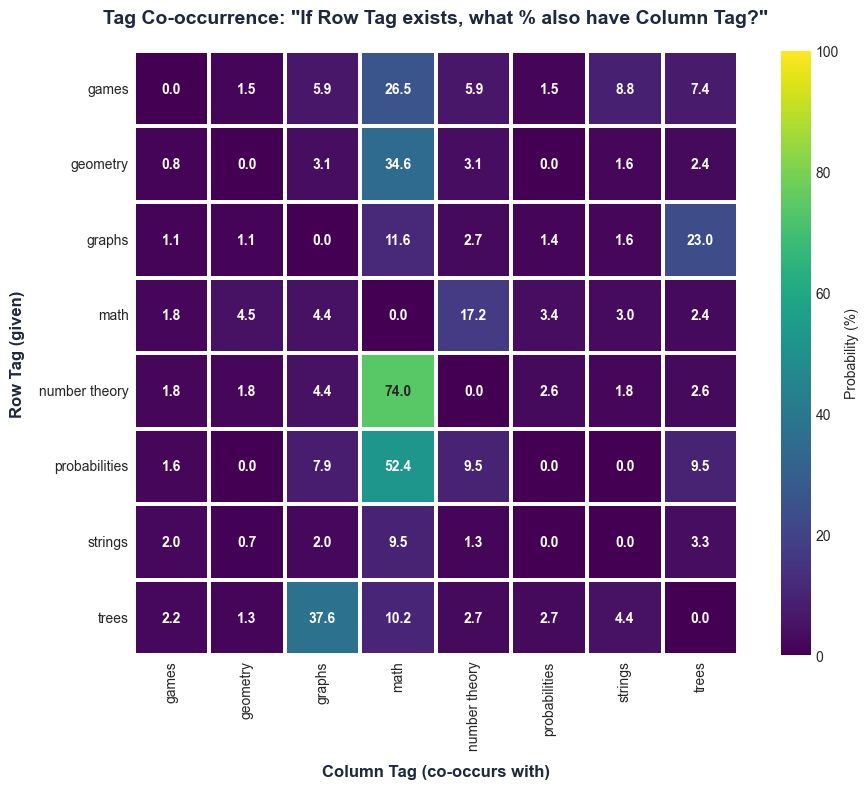

In [27]:
# Co-occurrence Analysis for Target Tags
from sklearn.preprocessing import MultiLabelBinarizer

# Filter dataframe to only include samples with at least one target tag
df_target = df[df['num_target_tags'] > 0].copy()
print(f"Analyzing {len(df_target)} problems that have at least one target tag\n")

# Create binary matrix for target tags only
target_tags_filtered = df_target['tags'].apply(
    lambda tags: [tag for tag in tags if tag in TARGET_TAGS]
)

mlb = MultiLabelBinarizer()
target_matrix = pd.DataFrame(
    mlb.fit_transform(target_tags_filtered), 
    columns=mlb.classes_
)

# Compute co-occurrence matrix (dot product)
co_occurrence = target_matrix.T.dot(target_matrix)

# Calculate conditional probabilities matrix
# P(tag_j | tag_i) = count(i,j) / count(i)
tag_counts = target_matrix.sum(axis=0)
conditional_probs = pd.DataFrame(
    np.zeros_like(co_occurrence.values, dtype=float),
    index=co_occurrence.index,
    columns=co_occurrence.columns
)

for i, tag_i in enumerate(co_occurrence.index):
    for j, tag_j in enumerate(co_occurrence.columns):
        if tag_counts[tag_i] > 0:
            # P(tag_j | tag_i) = how often tag_j appears given tag_i
            conditional_probs.iloc[i, j] = (co_occurrence.iloc[i, j] / tag_counts[tag_i]) * 100

fig, ax = plt.subplots(figsize=(10, 8))

# Set diagonal to 0 to focus on co-occurrences
conditional_probs_viz = conditional_probs.copy()
np.fill_diagonal(conditional_probs_viz.values, 0)

sns.heatmap(conditional_probs_viz,
            annot=True,
            fmt='.1f',
            cmap='viridis',
            square=True,
            linewidths=1.5,
            cbar_kws={'label': 'Probability (%)'},
            ax=ax,
            vmin=0,
            vmax=100,
            annot_kws={'fontsize': 10, 'fontweight': 'bold'})

ax.set_title('Tag Co-occurrence: "If Row Tag exists, what % also have Column Tag?"', 
             fontsize=14, fontweight='bold', color='#1E293B', pad=20)
ax.set_xlabel('Column Tag (co-occurs with)', fontsize=12, fontweight='bold', color='#1E293B', labelpad=10)
ax.set_ylabel('Row Tag (given)', fontsize=12, fontweight='bold', color='#1E293B', labelpad=10)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('figures/target_tags_conditional_probabilities.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
print("==> Saved conditional probabilities plot to: figures/target_tags_conditional_probabilities.png")
plt.show()

### 4. Text & Code Statistics

#### 4.1. Text and Code Length Analysis

In [16]:
# Combine text and code for analysis
df["combined_text"] = df["description"] + "\n\n" + df["code"]

In [21]:
# Token distribution analysis using CountVectorizer and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# CountVectorizer: Total tokens per document
vectorizer_count = CountVectorizer()
X_count = vectorizer_count.fit_transform(df["combined_text"])
df["num_tokens"] = X_count.sum(axis=1).A1  # Total tokens (including duplicates)

# TF-IDF: Unique tokens per document
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df["combined_text"])
df["num_unique_tokens"] = (X_tfidf > 0).sum(axis=1).A1  # Unique tokens only

# Get total unique tokens (vocabulary size) from TF-IDF
total_unique_tokens_tfidf = len(vectorizer_tfidf.vocabulary_)

print("\n" + "="*80)
print(" "*20 + "TOKENIZATION COMPARISON")
print("="*80)
print(f"\nCountVectorizer (Total Tokens - with repetitions):")
print(f"   • Vocabulary size: {len(vectorizer_count.vocabulary_):,} unique tokens")
print(f"   • Total tokens across all documents: {int(X_count.sum()):,}")
print(f"   • Average tokens per document: {df['num_tokens'].mean():.1f}")
print(f"   • Median tokens per document: {df['num_tokens'].median():.0f}")

print(f"\nTF-IDF (Unique Tokens - without repetitions):")
print(f"   • Vocabulary size: {total_unique_tokens_tfidf:,} unique tokens")
print(f"   • Total unique token occurrences: {int(X_tfidf.nnz):,}")
print(f"   • Average unique tokens per document: {df['num_unique_tokens'].mean():.1f}")
print(f"   • Median unique tokens per document: {df['num_unique_tokens'].median():.0f}")


                    TOKENIZATION COMPARISON

CountVectorizer (Total Tokens - with repetitions):
   • Vocabulary size: 26,583 unique tokens
   • Total tokens across all documents: 931,660
   • Average tokens per document: 269.3
   • Median tokens per document: 225

TF-IDF (Unique Tokens - without repetitions):
   • Vocabulary size: 26,583 unique tokens
   • Total unique token occurrences: 381,925
   • Average unique tokens per document: 110.4
   • Median unique tokens per document: 102
